In [196]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [197]:
# File to Load
city_data = pd.read_csv("Resources/city_data.csv")
city_data.head()
#len(city_data["city"].unique())

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [198]:
ride_data = pd.read_csv("Resources/ride_data.csv")
ride_data.head()
#len(ride_data["city"].unique())

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [199]:
# Combine the data into a single dataset
city_ride=pd.merge(ride_data, city_data, how="left", on=["city", "city"])
# Display the data table for preview
city_ride.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [200]:
# Obtain the x and y coordinates for each of the three city types
## Urban x, y and s
city_ride_urban = city_ride.loc[city_ride['type']=="Urban"]
city_ride_urban_group=city_ride_urban.groupby("city")
city_ride_urban_count=pd.Series(city_ride_urban_group["city"].count())
city_ride_urban_av_fare=pd.Series(city_ride_urban_group["fare"].mean())
driver_urban_count =pd.Series(city_ride_urban_group["driver_count"].mean())

In [201]:
## SubUrban x, y and s
city_ride_suburban = city_ride.loc[city_ride['type']=="Suburban"]
city_ride_suburban_group=city_ride_suburban.groupby("city")
city_ride_suburban_count=pd.Series(city_ride_suburban_group["city"].count())
city_ride_suburban_av_fare=pd.Series(city_ride_suburban_group["fare"].mean())
driver_suburban_count =pd.Series(city_ride_suburban_group["driver_count"].mean())

In [202]:
## Rural x, y and s
city_ride_rural = city_ride.loc[city_ride['type']=="Rural"]
city_ride_rural_group=city_ride_rural.groupby("city")
city_ride_rural_count=pd.Series(city_ride_rural_group["city"].count())
city_ride_rural_av_fare=pd.Series(city_ride_rural_group["fare"].mean())
driver_rural_count =pd.Series(city_ride_rural_group["driver_count"].mean())

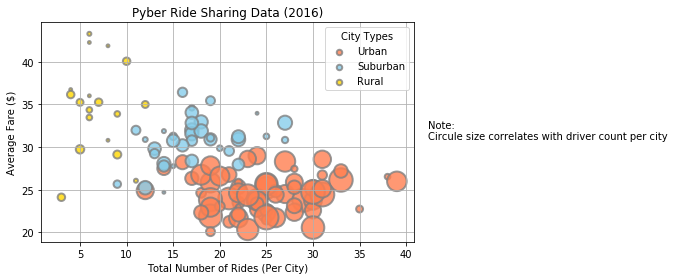

In [203]:
# Build the scatter plots for each city types
# Incorporate the other graph properties
# Create a legend
# Incorporate a text label regarding circle size
# Save Figure

# Change color with c and alpha

urban =  plt.scatter(city_ride_urban_count, city_ride_urban_av_fare, s=driver_urban_count*8, c="coral",alpha=0.8, edgecolors="gray", linewidth=2, label='Urban')
suburban = plt.scatter(city_ride_suburban_count, city_ride_suburban_av_fare, s=driver_suburban_count*8, c="skyblue",alpha=0.8, edgecolors="gray", linewidth=2, label='Suburban')
rural = plt.scatter(city_ride_rural_count, city_ride_rural_av_fare, s=driver_rural_count*8, c="gold",alpha=0.8, edgecolors="gray", linewidth=2, label='Rural')
lgnd= plt.legend(handles=[urban,suburban,rural], scatterpoints=1 , prop={'size': 10}, loc="upper right", title="City Types")
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid()
text="Note:" + '\n' + "Circule size correlates with driver count per city"
plt.gcf().text(1, 0.5, text, fontsize=10)
plt.tight_layout()
plt.savefig("pyber_ride_fare_bubble.png",bbox_inches="tight")
plt.show()

In [204]:
# Calculate Type Percents

city_type_group=city_ride.groupby("type")
city_type_group["fare"].sum()

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [205]:
city_fare_group_df=pd.DataFrame(city_type_group["fare"].sum())
city_fare_group_df=city_fare_group_df.rename(columns={"fare":"fare_sum"})
city_fare_group_df=city_fare_group_df.reset_index()
city_fare_group_df

,type,fare_sum
0,Rural,4327.93
1,Suburban,19356.33
2,Urban,39854.38


In [207]:
## For Test
total_fare=city_fare_group_df["fare_sum"].sum()
total_fare

63538.6400000001

In [208]:
## For Test
city_fare_group_df["percent"]=city_fare_group_df["fare_sum"]/total_fare*100
city_fare_group_df

,type,fare_sum,percent
0,Rural,4327.93,6.811493
1,Suburban,19356.33,30.463872
2,Urban,39854.38,62.724635


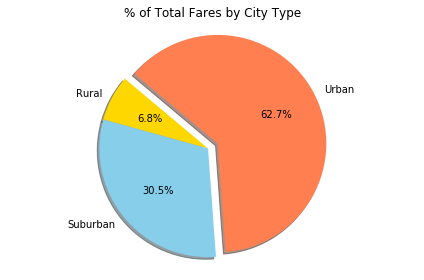

In [221]:
# Build Pie Chart
# Save Figure

colors =["gold","skyblue","coral"]
explode = (0,0,0.1)
# Tell matplotlib to create a pie chart based upon the above data
plt.pie(city_fare_group_df["fare_sum"], explode=explode, labels=city_fare_group_df["type"], colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.title("% of Total Fares by City Type")
# Save an image of our chart and print the final product to the screen
plt.tight_layout()
plt.savefig("pyber_fares_pie.png")
plt.show()

In [210]:
# Calculate Ride Percents

city_type_group["ride_id"].count()

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [211]:
city_ride_group_df=pd.DataFrame(city_type_group["ride_id"].count())
city_ride_group_df=city_ride_group_df.rename(columns={"ride_id":"ride_id_count"})
city_ride_group_df=city_ride_group_df.reset_index()
city_ride_group_df

,type,ride_id_count
0,Rural,125
1,Suburban,625
2,Urban,1625


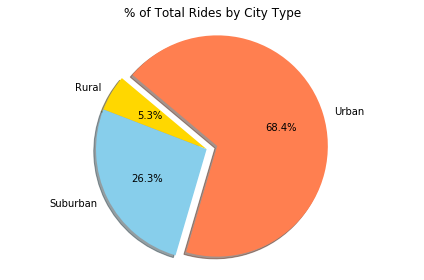

In [219]:
# Build Pie Chart
# Save Figure

colors =["gold","skyblue","coral"]
explode = (0,0,0.1)
# Tell matplotlib to create a pie chart based upon the above data
plt.pie(city_ride_group_df["ride_id_count"], explode=explode, labels=city_ride_group_df["type"], colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.title("% of Total Rides by City Type")
# Save an image of our chart and print the final product to the screen
plt.tight_layout()
plt.savefig("pyber_rides_pie.png")
plt.show()

In [213]:
# Calculate Driver Percents

city_data_group=city_data.groupby("type")
city_data_group["driver_count"].sum()

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [214]:
city_driver_group_df=pd.DataFrame(city_data_group["driver_count"].sum())
city_driver_group_df=city_driver_group_df.reset_index()
city_driver_group_df

,type,driver_count
0,Rural,78
1,Suburban,490
2,Urban,2405


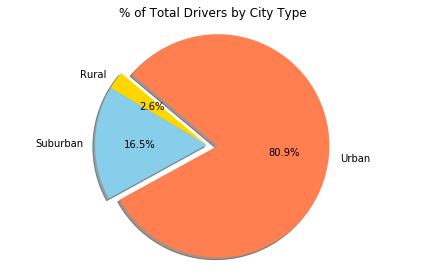

In [217]:
# Build Pie Chart
# Save Figure

colors =["gold","skyblue","coral"]
explode = (0,0,0.1)
# Tell matplotlib to create a pie chart based upon the above data
plt.pie(city_driver_group_df["driver_count"], explode=explode, labels=city_driver_group_df["type"], colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.title("% of Total Drivers by City Type")
# Save an image of our chart and print the final product to the screen
plt.tight_layout()
plt.savefig("pyber_drivers_pie.png")
plt.show()

In [ ]:
### Observable Trends
# The total number of rides is higher in urban zones, than in suburbans and rural.
# The average fare increases in rural zones.
# The number of drivers is much higher in urban zones (>80%), and very low in rural zones (2.6%)